Setting up the Required Libraries

In [2]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for data visualization (optional but useful)
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Optional: For data preprocessing and train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

#task 6 - polynomial features in linear regrssion 
# x1 x2 x3  (new table x1*x3 = interaction effect)

In [4]:
# Read the datasets
train_data = pd.read_csv('bike_train.csv')  # Training dataset
test_data = pd.read_csv('bike_test.csv')  # Testing dataset

# Display the first few rows to ensure the data is loaded correctly
print(train_data.head())
print(test_data.head())


         Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0  2017-12-01                254     0         -5.2        37         2.2   
1  2017-12-01                204     1         -5.5        38         0.8   
2  2017-12-01                173     2         -6.0        39         1.0   
3  2017-12-01                107     3         -6.2        40         0.9   
4  2017-12-01                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  
0  Winter  No Holiday             

In [33]:
missing_values = train_data.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
if not missing_columns.empty:
    print("Columns with missing values:\n", missing_columns)
else:
    print("No missing values found in the features ")
    


No missing values found in the features 


In [34]:
missing_values = test_data.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
if not missing_columns.empty:
    print("Columns with missing values:\n", missing_columns)
else:
    print("No missing values found in the features ")
    


No missing values found in the features 


In [8]:
# Checking the dimensions of the datasets
print(train_data.shape)
print(test_data.shape)


(7200, 14)
(1560, 14)


In [35]:
# Display the summary of the dataset
print(train_data.info())

# Display descriptive statistics for numeric columns
print(train_data.describe())

# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)
categorical_colstest = test_data.select_dtypes(include=['object']).columns.tolist()


# Identify numeric columns
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   7200 non-null   datetime64[ns]
 1   Rented_Bike_Count      7200 non-null   int64         
 2   Hour                   7200 non-null   int64         
 3   Temperature            7200 non-null   float64       
 4   Humidity               7200 non-null   int64         
 5   Wind_speed             7200 non-null   float64       
 6   Visibility             7200 non-null   int64         
 7   Dew_point_temperature  7200 non-null   float64       
 8   Solar_Radiation        7200 non-null   float64       
 9   Rainfall               7200 non-null   float64       
 10  Snowfall               7200 non-null   float64       
 11  Seasons                7200 non-null   object        
 12  Holiday                7200 non-null   object        
 13  Fun

In [36]:
# Step 1: Convert the 'Date' column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Step 2: Extract features from the date
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day
train_data['Day_of_Week'] = train_data['Date'].dt.dayofweek
train_data['Is_Weekend'] = (train_data['Day_of_Week'] >= 5).astype(int)
#-------------------------------------------------------------------------
#Convert date in test data as well 

test_data['Date'] = pd.to_datetime(test_data['Date'])

# Step 2: Extract features from the date
test_data['Year'] = test_data['Date'].dt.year
test_data['Month'] = test_data['Date'].dt.month
test_data['Day'] = test_data['Date'].dt.day
test_data['Day_of_Week'] = test_data['Date'].dt.dayofweek
test_data['Is_Weekend'] = (test_data['Day_of_Week'] >= 5).astype(int)






# Define categorical columns explicitly
categorical_cols = ['Seasons', 'Holiday', 'Functioning_Day']  # Update with actual categorical columns

# Step 4: Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Step 5: Fit and transform the categorical columns for the training set
encoded_features = encoder.fit_transform(train_data[categorical_cols])

# Step 5 (continued): Transform the categorical columns for the test set
encoded_featurestest = encoder.transform(test_data[categorical_cols])

# Step 6: Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
encoded_dftest = pd.DataFrame(encoded_featurestest, columns=encoder.get_feature_names_out(categorical_cols))  # Use the same feature names

# Step 7: Drop original categorical columns and concatenate the encoded DataFrame
train_data_transformed = train_data.drop(columns=categorical_cols).reset_index(drop=True)
train_data_transformed = pd.concat([train_data_transformed, encoded_df], axis=1)

test_data_transformed = test_data.drop(columns=categorical_cols).reset_index(drop=True)
test_data_transformed = pd.concat([test_data_transformed, encoded_dftest], axis=1)


# Display the transformed dataset
print(train_data_transformed.head())
print(test_data_transformed.head())



        Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  ...  Year  \
0        2000                  -17.6              0.0       0.0  ...  2017   
1        2000                  -17.6              0.0       0.0  ...  2017   
2        2000                  -17.7              0.0       0.0  ...  2017   
3        2000                  -17.6              0.0       0.0  ...  2017   
4        2000                  -18.6              0.0       0.0  ...  2017   

   Month  Day  Day_of_Week  Is_Weekend  Seasons_Spring  Seasons_Summer  \


visualize the relationship between each independent variable 

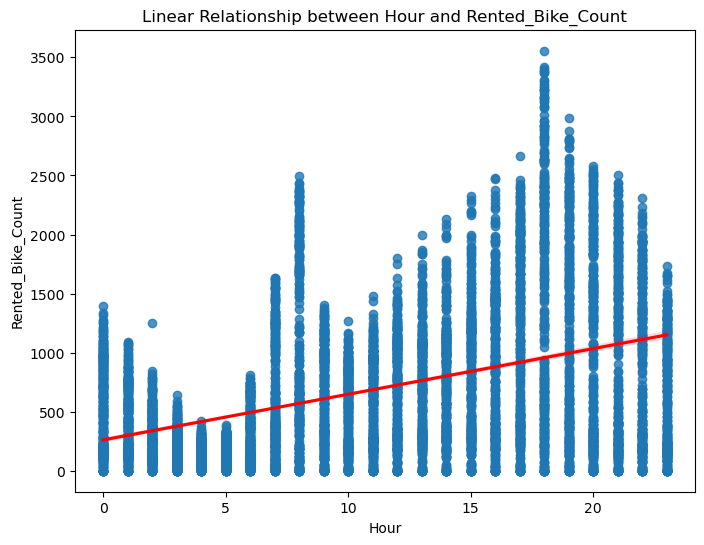

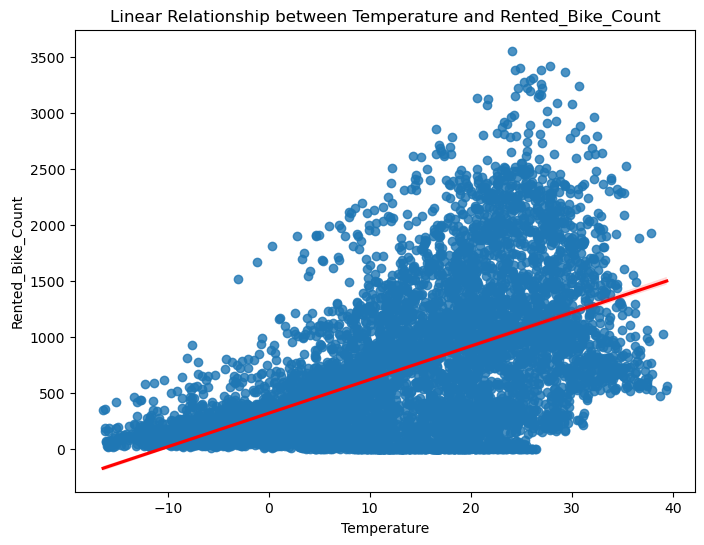

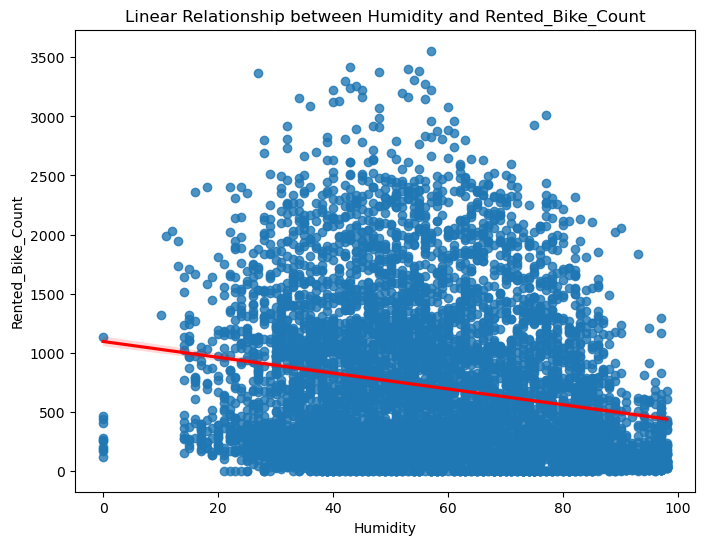

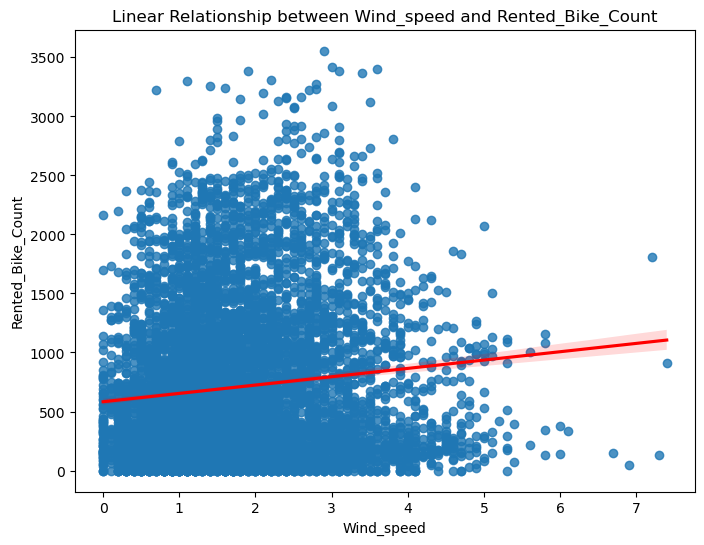

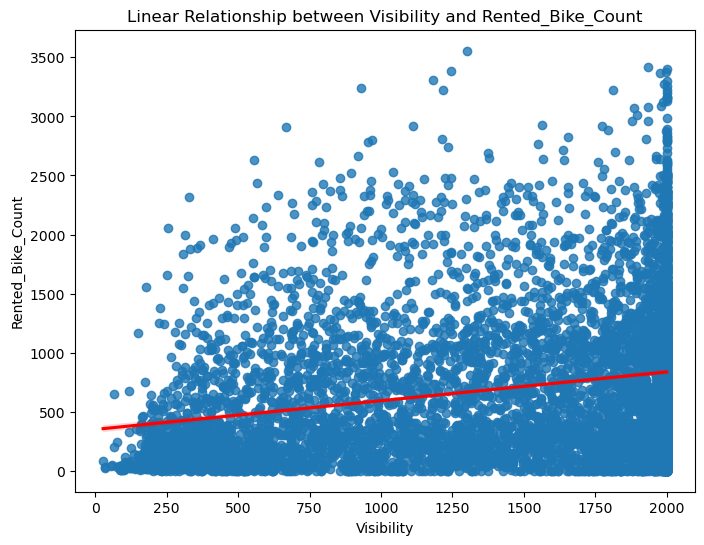

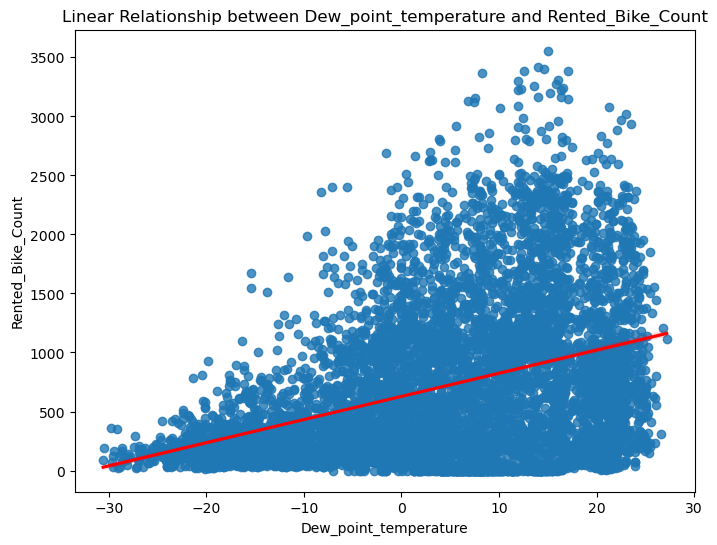

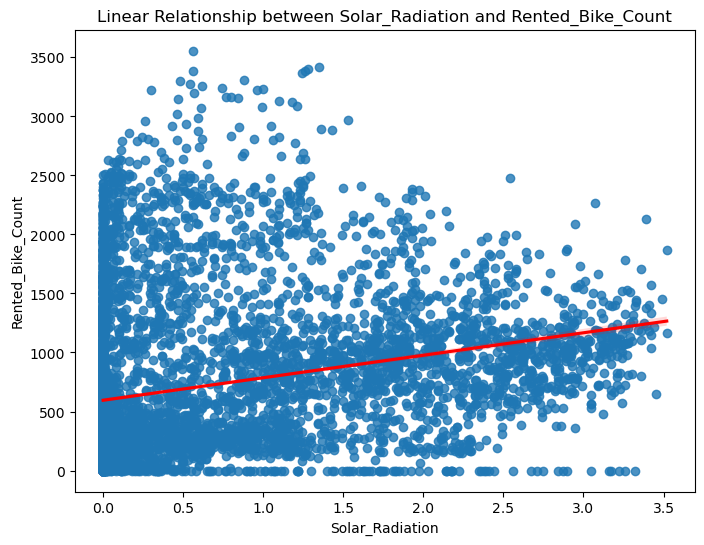

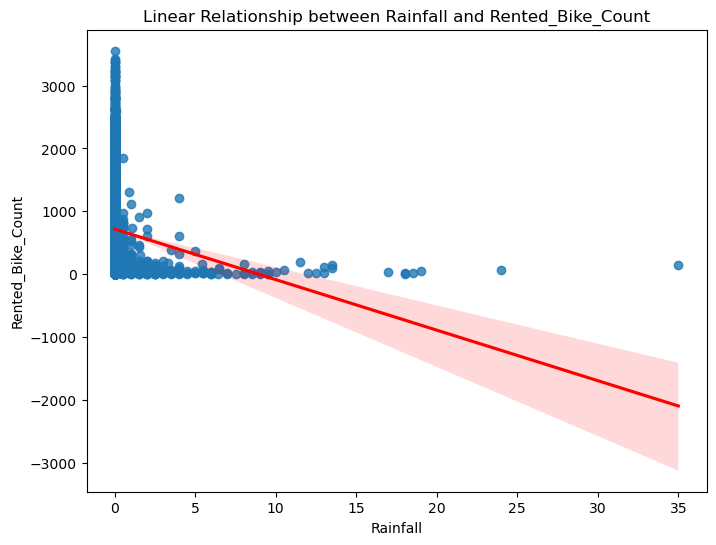

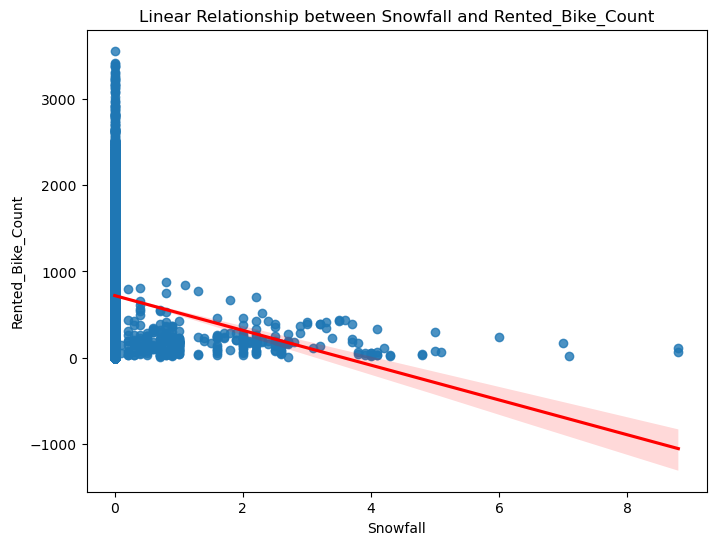

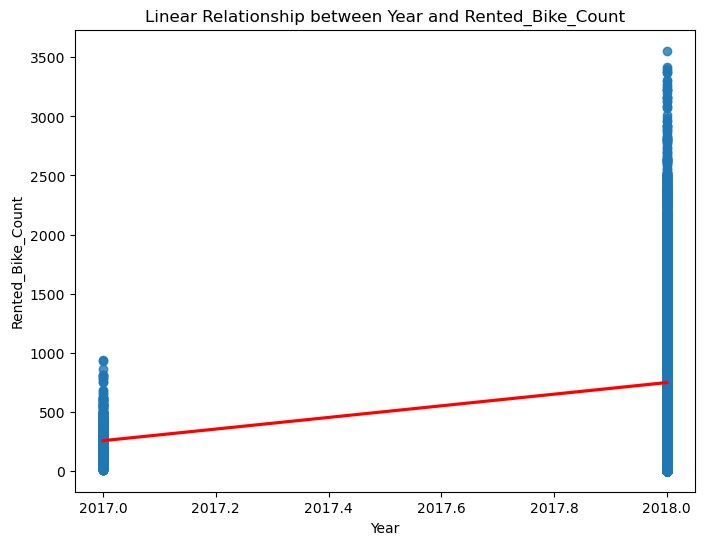

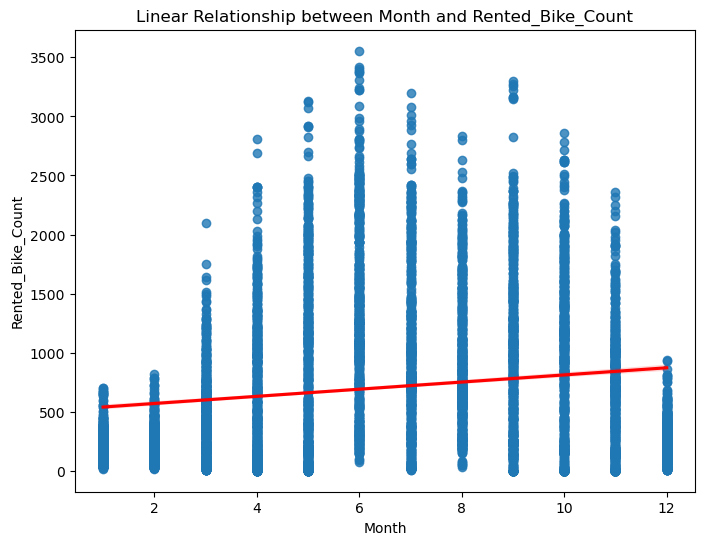

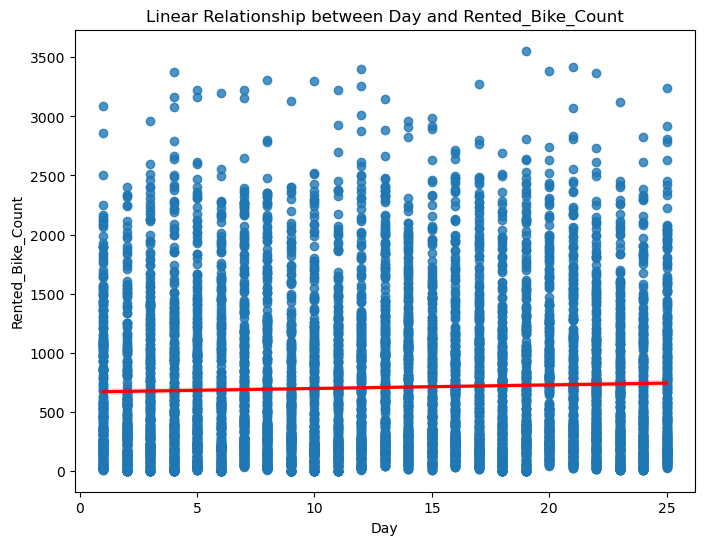

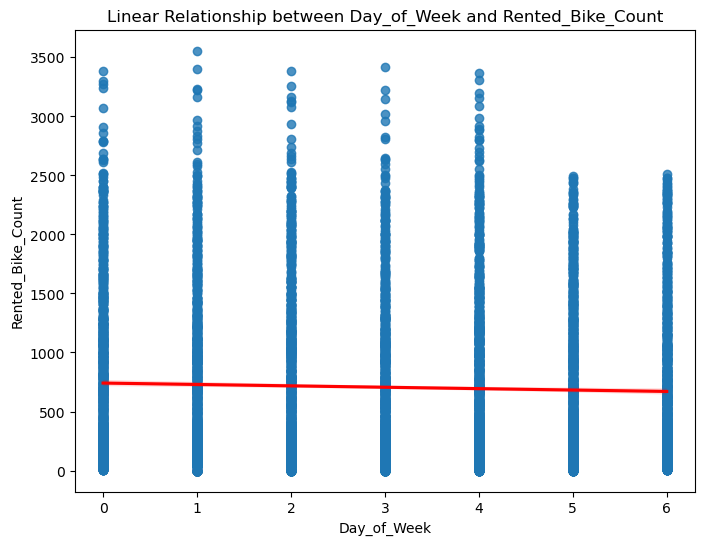

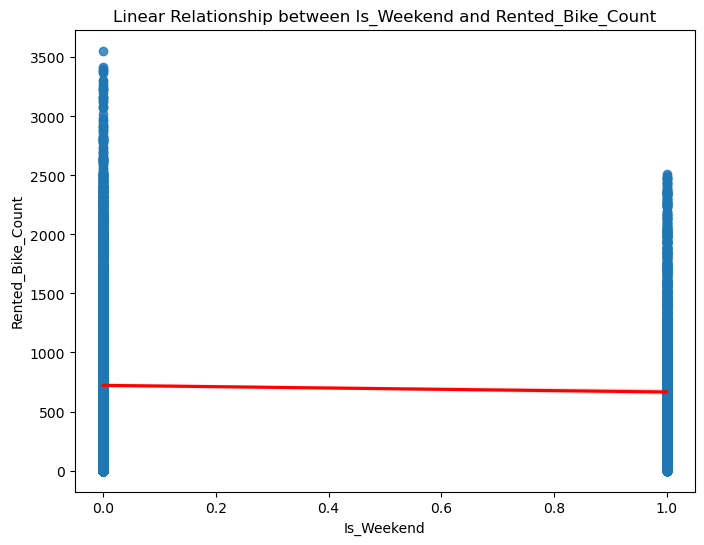

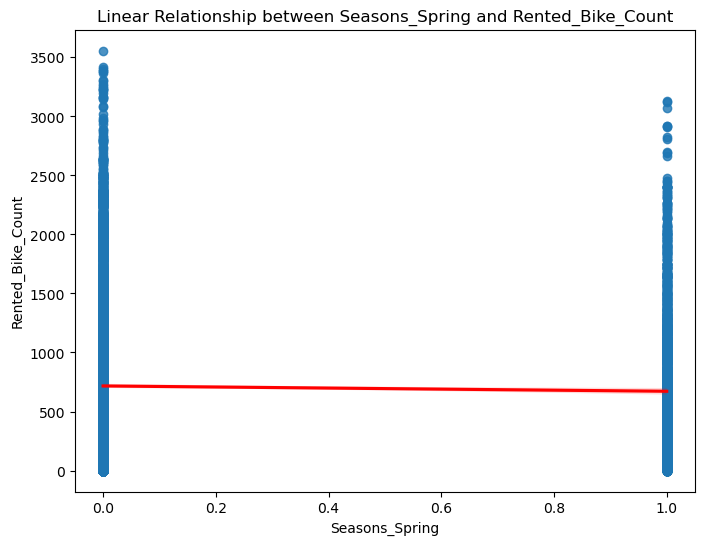

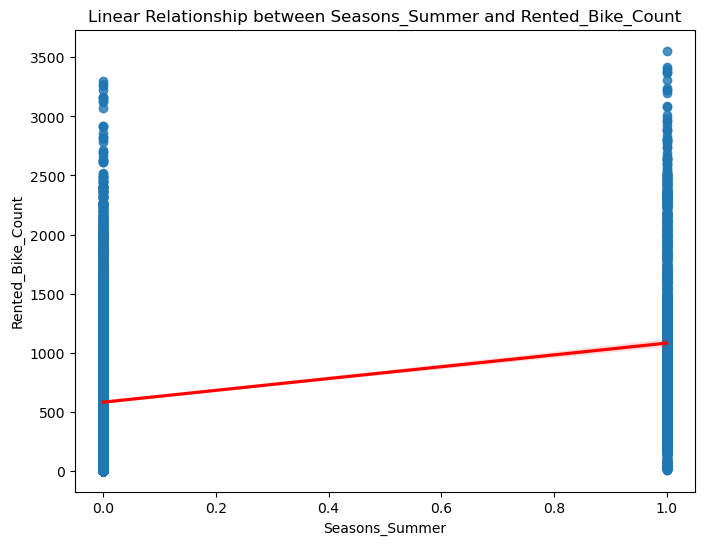

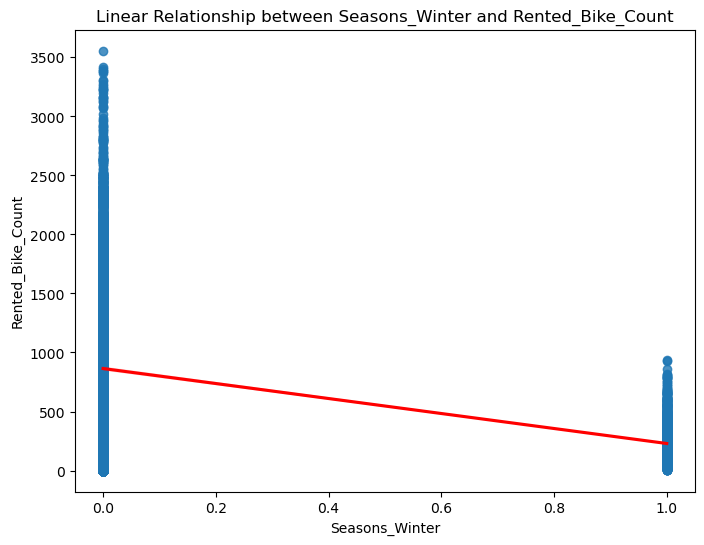

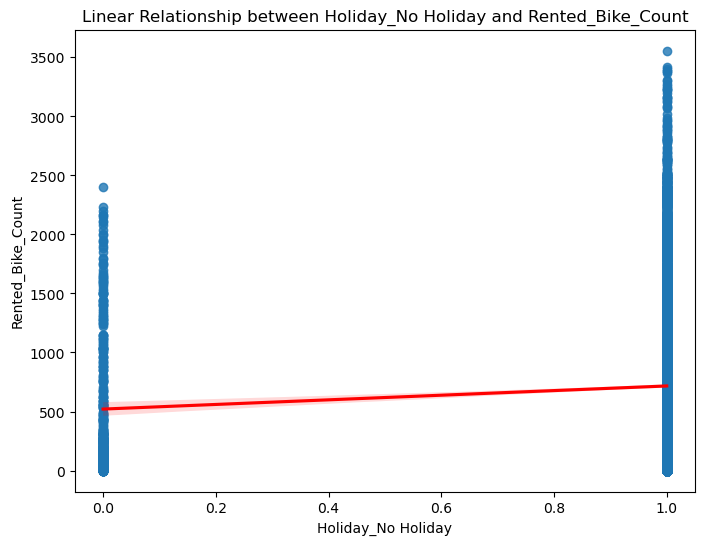

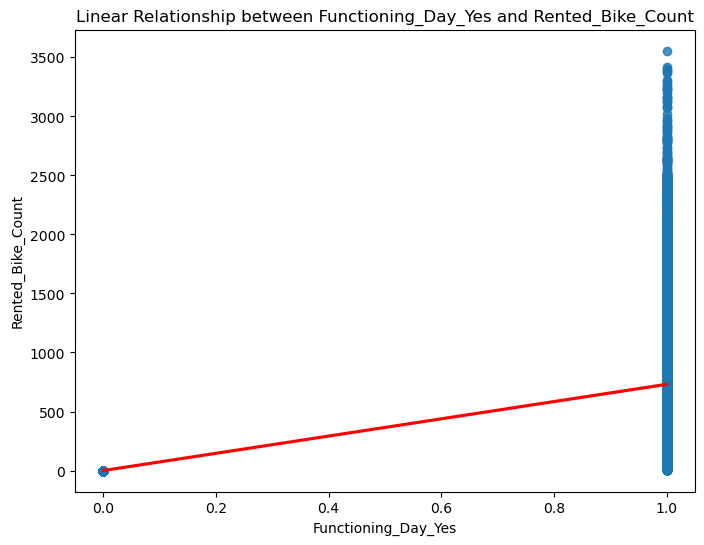

In [37]:
# Step 1: Define the target variable
target_variable = 'Rented_Bike_Count'
drop_date = 'Date'


# Step 2: Drop the target variable from the transformed dataset
X = train_data_transformed.drop(columns=[target_variable, drop_date])
y = train_data_transformed[target_variable]

# Step 2: Drop the target variable from the transformed dataset
# Drop both the target variable and the date column in one line

# Step 3: Select only numeric features for plotting
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Step 4: Plot linear relationships between each numeric feature and the target variable
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=X[feature], y=y, line_kws={"color": "red"})
    plt.title(f"Linear Relationship between {feature} and {target_variable}")
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()


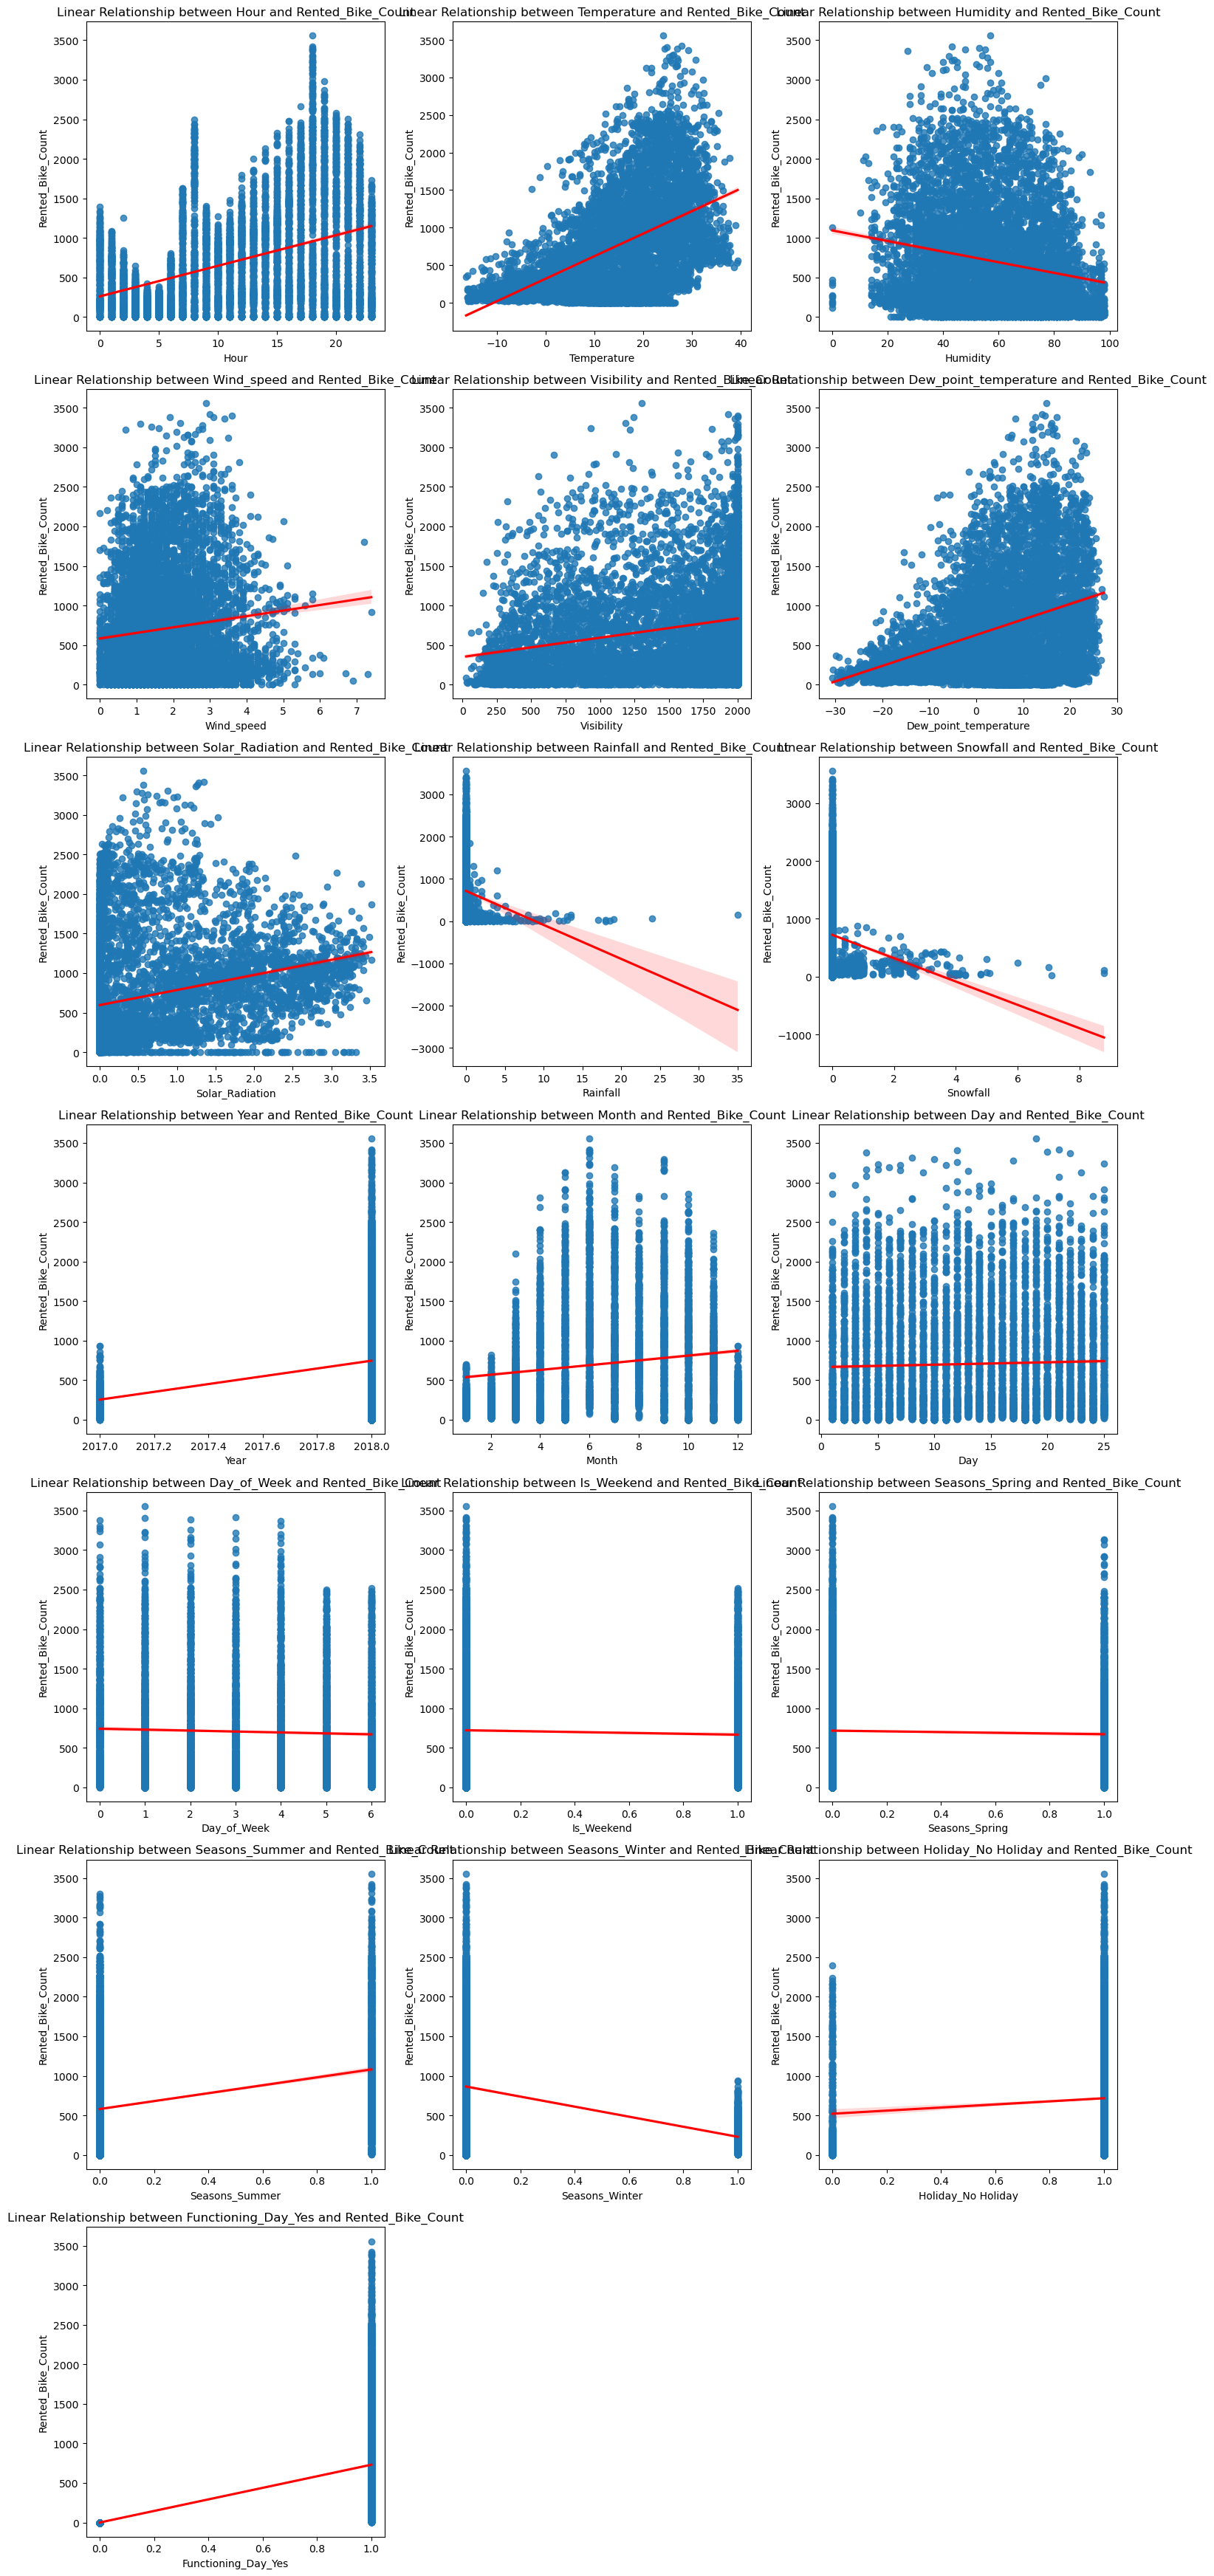

In [38]:
# Step 1: Define the target variable
#target_variable = 'Rented_Bike_Count'

# Step 2: Drop the target variable from the transformed dataset

# Step 3: Select only numeric features for plotting
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Step 4: Set the number of rows and columns for subplots
num_features = len(numeric_features)
cols = 3  # Number of columns in the subplot
rows = (num_features + cols - 1) // cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Step 5: Plot linear relationships between each numeric feature and the target variable
for i, feature in enumerate(numeric_features):
    sns.regplot(x=X[feature], y=y, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f"Linear Relationship between {feature} and {target_variable}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_variable)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [25]:
correlation_matrix = train_data_transformed.corr()
print(correlation_matrix[target_variable])


Date                     0.360607
Rented_Bike_Count        1.000000
Hour                     0.410754
Temperature              0.548657
Humidity                -0.208198
Wind_speed               0.113308
Visibility               0.223146
Dew_point_temperature    0.389269
Solar_Radiation          0.256194
Rainfall                -0.125171
Snowfall                -0.136588
Year                     0.208702
Month                    0.160150
Day                      0.033493
Day_of_Week             -0.036341
Is_Weekend              -0.038981
Seasons_Spring          -0.029836
Seasons_Summer           0.332637
Seasons_Winter          -0.421867
Holiday_No Holiday       0.069450
Functioning_Day_Yes      0.204081
Name: Rented_Bike_Count, dtype: float64


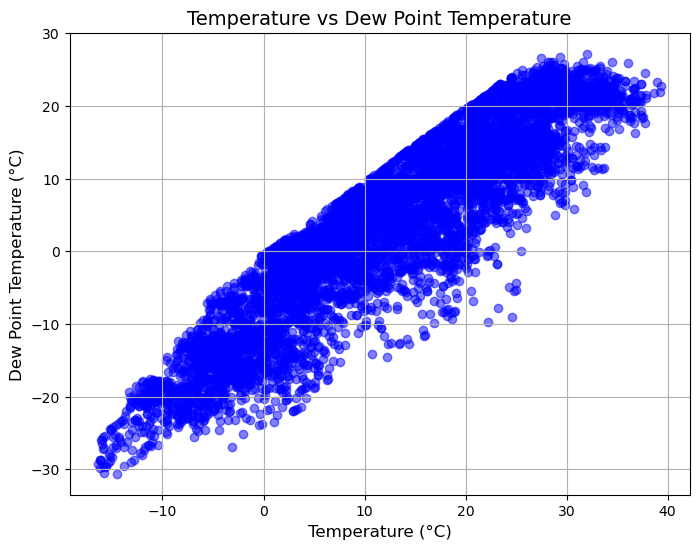

In [10]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(train_data['Temperature'], train_data['Dew_point_temperature'], color='blue', alpha=0.5)

# Add labels and title
plt.title('Temperature vs Dew Point Temperature', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Dew Point Temperature (°C)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

In [41]:
# Step 1: Initialize the Linear Regression model
model = LinearRegression()

# Step 2: Fit the model on the training data
model.fit(X, y)

# Step 3: Get predictions on the training data
train_predictions = model.predict(X)

# Step 4: Evaluate the model performance on the training data
mse_train = mean_squared_error(y, train_predictions)
r2_train = r2_score(y, train_predictions)

print("Mean Squared Error (MSE) on training data:", mse_train)
print("R-squared (R2) on training data:", r2_train)

# Step 5: Prepare the test features and target variable
X_test = test_data_transformed.drop(columns=[target_variable, drop_date])  # Replace drop_date with the actual column name if needed
y_test = test_data_transformed[target_variable]  # Assuming target_variable is defined

# Step 6: Get predictions on the test data
test_predictions = model.predict(X_test)

# Step 7: Evaluate the model performance on the test data
mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

print("Mean Squared Error (MSE) on test data:", mse_test)
print("R-squared (R2) on test data:", r2_test)


Mean Squared Error (MSE) on training data: 184743.63568740772
R-squared (R2) on training data: 0.5646511427000529
Mean Squared Error (MSE) on test data: 184712.55523626288
R-squared (R2) on test data: 0.5103927046237657


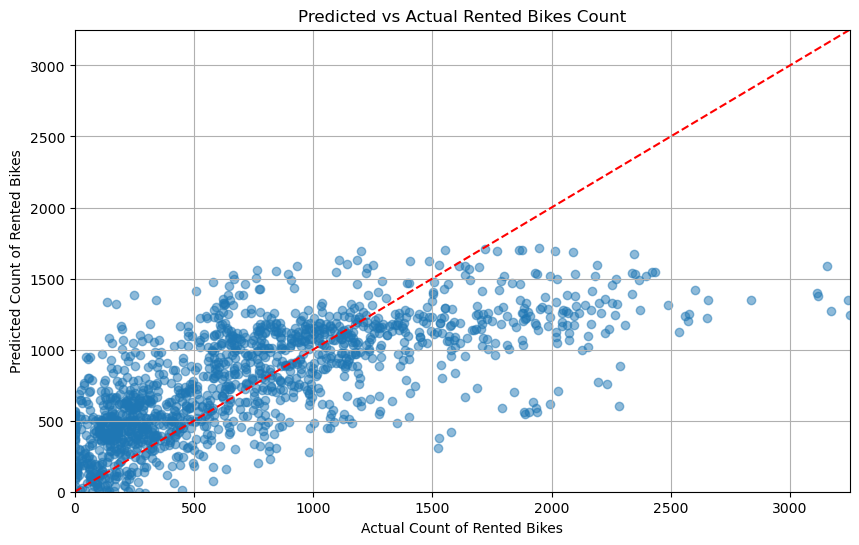

In [40]:
# plotting the predicitions

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Count of Rented Bikes')
plt.ylabel('Predicted Count of Rented Bikes')
plt.title('Predicted vs Actual Rented Bikes Count')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

R-squared (R2) on test data: 0.779391433166037


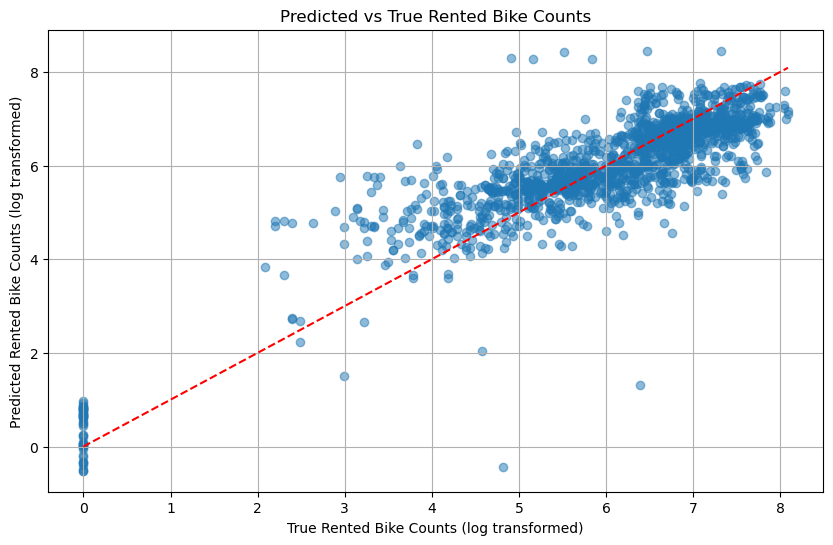

In [46]:



y = np.log(train_data_transformed[target_variable] + 1)
y_test = np.log(test_data_transformed[target_variable] + 1)

# Prepare the features
X = train_data_transformed.drop(columns=[target_variable, drop_date])  # Replace 'drop_date' with the actual column name
X_test = test_data_transformed.drop(columns=[target_variable, drop_date])  # Same for test set

# Step 1: Initialize the Linear Regression model
model = LinearRegression()

# Step 2: Fit the model on the training data
model.fit(X, y)

# Step 3: Get predictions on the test data
test_predictions = model.predict(X_test)

# Step 4: Calculate the R² measure of fit
r2_test = r2_score(y_test, test_predictions)

print("R-squared (R2) on test data:", r2_test)

# Step 5: Plot predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line y=x for reference
plt.xlabel('True Rented Bike Counts (log transformed)')
plt.ylabel('Predicted Rented Bike Counts (log transformed)')
plt.title('Predicted vs True Rented Bike Counts')
plt.grid(True)
plt.show()


In [49]:
print(X_interaction.columns)


Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Year', 'Month', 'Day', 'Day_of_Week', 'Is_Weekend', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning_Day_Yes'],
      dtype='object')


                         Interaction Pair  R2 without Interaction  \
0                  Temperature * Humidity                0.168237   
1             Seasons_Spring * Wind_speed               -0.007296   
2             Seasons_Summer * Visibility               -0.044612   
3  Seasons_Winter * Dew_point_temperature                0.093642   

   R2 with Interaction  
0             0.777812  
1             0.780853  
2             0.777139  
3             0.774627  


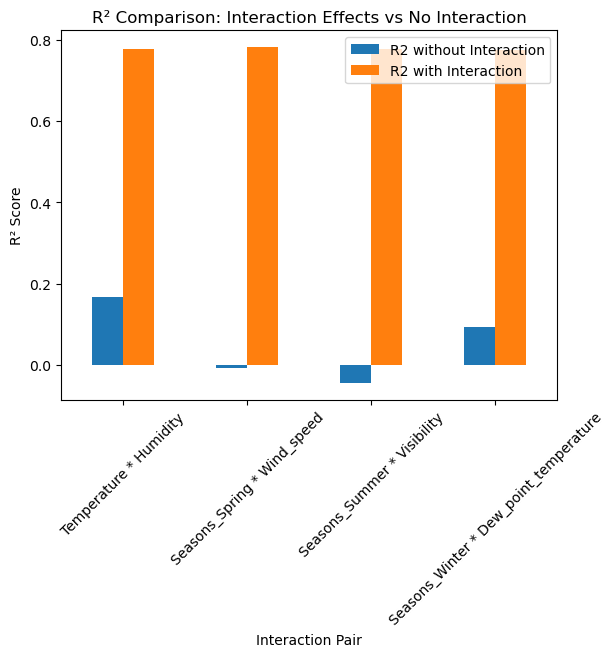

In [50]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming train_data_transformed and test_data_transformed are your transformed datasets
X = train_data_transformed.drop(columns=[target_variable, drop_date])  # Prepare features
y = np.log(train_data_transformed[target_variable] + 1)  # Target variable

X_test = test_data_transformed.drop(columns=[target_variable, drop_date])  # Test features
y_test = np.log(test_data_transformed[target_variable] + 1)  # Test target variable

# Update interaction pairs with the actual columns
interaction_pairs = [
    ('Temperature', 'Humidity'),          # Both numerical
    ('Seasons_Spring', 'Wind_speed'),     # Categorical and numerical
    ('Seasons_Summer', 'Visibility'),     # Categorical and numerical
    ('Seasons_Winter', 'Dew_point_temperature'), # Categorical and numerical
]

# Store results
results = []

for feature1, feature2 in interaction_pairs:
    # Prepare the feature matrix
    X_interaction = X.copy()
    X_test_interaction = X_test.copy()
    
    # Create polynomial features with interaction terms
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    
    # Fit polynomial features on training data
    poly_features = poly.fit_transform(X_interaction[[feature1, feature2]])
    poly_features_test = poly.transform(X_test_interaction[[feature1, feature2]])
    
    # Add interaction features to the original features
    X_interaction = np.hstack((X_interaction, poly_features))
    X_test_interaction = np.hstack((X_test_interaction, poly_features_test))
    
    # Initialize and fit the model with interaction effects
    model_with_interaction = LinearRegression()
    model_with_interaction.fit(X_interaction, y)
    
    # Predictions
    test_predictions_interaction = model_with_interaction.predict(X_test_interaction)
    
    # Calculate R²
    r2_interaction = r2_score(y_test, test_predictions_interaction)
    
    # Prepare the base model (without interaction)
    model_without_interaction = LinearRegression()
    model_without_interaction.fit(X[[feature1, feature2]], y)
    
    # Predictions for the base model
    test_predictions_base = model_without_interaction.predict(X_test[[feature1, feature2]])
    
    # Calculate R² for the base model
    r2_base = r2_score(y_test, test_predictions_base)

    # Store the results
    results.append({
        'Interaction Pair': f"{feature1} * {feature2}",
        'R2 without Interaction': r2_base,
        'R2 with Interaction': r2_interaction
    })

# Create a DataFrame to summarize results
results_df = pd.DataFrame(results)
print(results_df)

# Visualize the comparison if needed
results_df.plot(x='Interaction Pair', y=['R2 without Interaction', 'R2 with Interaction'], kind='bar')
plt.title('R² Comparison: Interaction Effects vs No Interaction')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.show()
